### Environment-A
- Construction of disks with 'eyes' (directions)
- Creating a loop of those directions. 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation

In [2]:
# Constants
GRID_SIZE = 30
NUM_NODES = 12
ANGLE_STEPS = 36 #360/36 = 10, so the arrows move 10 degrees at once

In [3]:
#Making the 2D-Grid
grid_size = GRID_SIZE
grid = np.zeros((grid_size, grid_size))



In [4]:
#initialize positions and angles, call the disks as nodes
nodes = []
position = ()  # (x, y)
eye_angle_idx = 0  # index from 0 to 35
connected_to = None  # another DiskNode ID

In [5]:
def eye_direction(eye_angle_idx):
    eye_angle = eye_angle_idx
    angle_deg = eye_angle * 10
    rad = np.deg2rad(angle_deg)
    return np.cos(rad), np.sin(rad)

In [6]:
def initialize_nodes(nodes, positions, angle_steps):
    positions = positions
    angle_steps = angle_steps
    for i, pos in enumerate(positions):
        angle_idx = random.randint(0, angle_steps-1)
        eye = eye_direction(angle_idx)
        nodes_tuple = (i, pos, eye)
        nodes.append(list(nodes_tuple))
    return nodes

In [7]:
def get_valid_positions(num_nodes,grid_size):
    positions = set()
    grid_size = grid_size
    while len(positions) < num_nodes:
        x, y = random.randint(1, grid_size - 2), random.randint(1, grid_size - 2)
        positions.add((x, y))
    return list(positions)

In [8]:
positions = get_valid_positions(num_nodes=NUM_NODES,grid_size=GRID_SIZE)

In [21]:
initialized_nodes = initialize_nodes(nodes, positions, angle_steps=ANGLE_STEPS)

In [10]:
nodes

[[0, (4, 10), (-0.5000000000000004, -0.8660254037844385)],
 [1, (5, 15), (-0.7660444431189779, 0.6427876096865395)],
 [2, (12, 7), (0.7660444431189778, -0.6427876096865396)],
 [3, (21, 13), (0.6427876096865394, 0.766044443118978)],
 [4, (6, 20), (-0.17364817766693033, -0.984807753012208)],
 [5, (28, 3), (0.6427876096865394, 0.766044443118978)],
 [6, (20, 26), (0.7660444431189778, -0.6427876096865396)],
 [7, (7, 9), (-0.4999999999999998, 0.8660254037844387)],
 [8, (16, 15), (0.984807753012208, -0.1736481776669304)],
 [9, (15, 19), (-0.34202014332566855, -0.9396926207859084)],
 [10, (15, 12), (0.7660444431189778, -0.6427876096865396)],
 [11, (21, 17), (-0.6427876096865395, -0.7660444431189779)]]

In [12]:
nodes[2]

[2, (12, 7), (0.7660444431189778, -0.6427876096865396)]

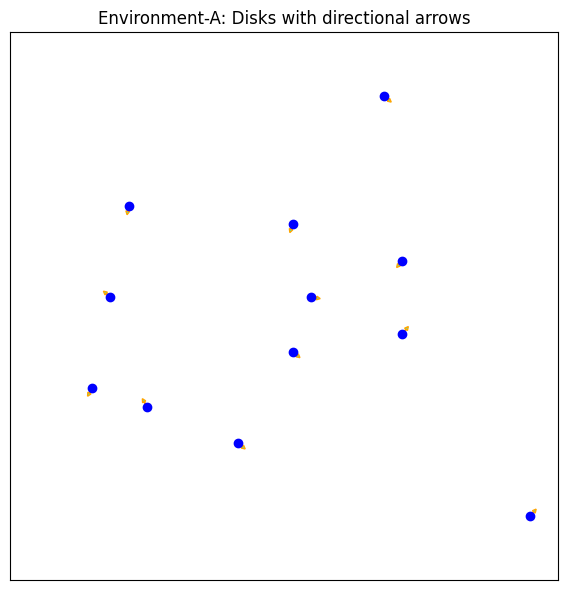

In [17]:
# --- Matplotlib Setup ---
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, GRID_SIZE)
ax.set_ylim(0, GRID_SIZE)
ax.set_title("Environment-A: Disks with directional arrows")
ax.set_xticks([])
ax.set_yticks([])

for node in nodes:
    x, y = node[1]
    dx, dy = node[2]
    ax.plot(x + 0.5, y + 0.5, 'bo')  # Disk center
    ax.arrow(x + 0.5, y + 0.5, 0.3 * dx, 0.3 * dy, head_width=0.2, head_length=0.2, fc='cyan', ec='orange')

plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()